In [9]:
import datetime
import pandas as pd
import plotly.express as px

df = pd.read_csv("./data.csv")
df = df.drop("Unnamed: 0",axis=1)
df = df.melt("date")
df[['type','district']] = df['variable'].str.extract(r'bi([ob])(\d)')
df.drop('variable',axis=1)
df['type'] = df['type'].replace({'b':'business', 'o':'operation'})
df['district'] = df['district'].replace({"6": "6 Atlanta", "8": "8 St. Louis"})
df = df.rename(columns={'value':'n_banks'})

df = df[['date', 'type', 'district', 'n_banks']]
#df = df.set_index('date')
df.date = pd.to_datetime(df.date)
df

,date,type,district,n_banks
0,1929-07-01,business,6 Atlanta,141
1,1929-07-02,business,6 Atlanta,141
2,1929-07-03,business,6 Atlanta,141
3,1929-07-04,business,6 Atlanta,141
4,1929-07-05,business,6 Atlanta,141
...,...,...,...,...
7507,1934-08-17,operation,8 St. Louis,108
7508,1934-08-18,operation,8 St. Louis,108
7509,1934-08-19,operation,8 St. Louis,108
7510,1934-08-20,operation,8 St. Louis,108


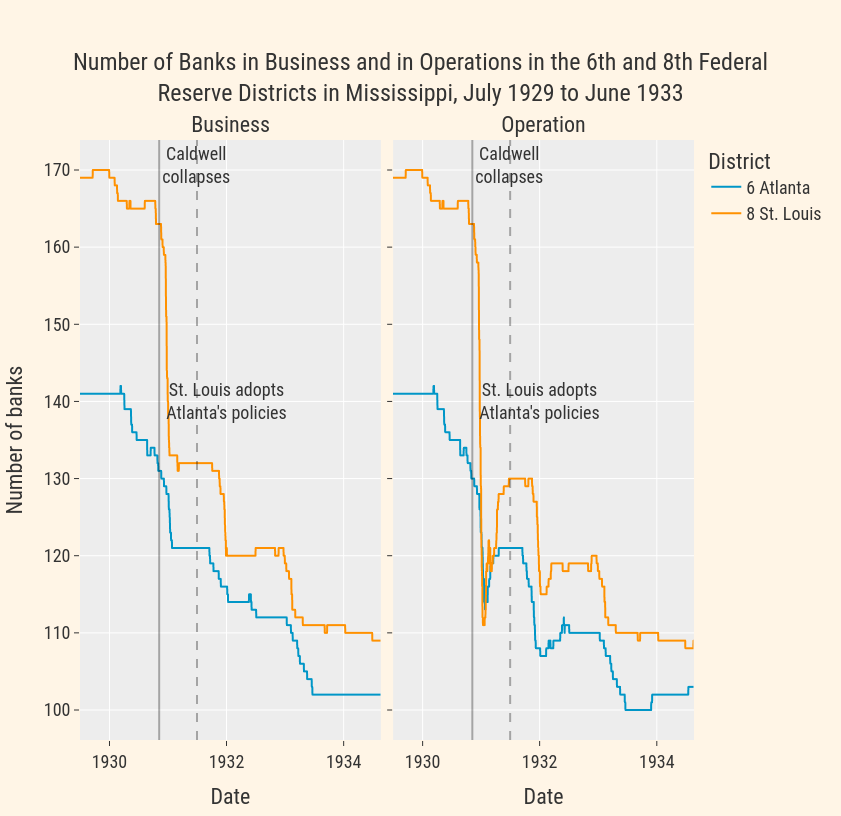

In [10]:
import plotly.graph_objects as go
import plotly.io as pio

pio.templates["econ"] = go.layout.Template(
layout = {
    # Fonts
    # Note - 'family' must be a single string, NOT a list or dict!
    'title':
        {'font': {'family': 'Roboto Condensed, bold', 
                  'size':24,
                  'color': '#333'}
        },
    'font': {'family': 'Roboto Condensed', 
                  'size':18,
                  'color': '#333'},
    # Colorways
    #'colorway': ['#ec7424', '#a4abab'],
    # Keep adding others as needed below
    'hovermode': 'x unified',
    'margin': {'l':20, 'r':20, 't':140, 'b':20},
    'paper_bgcolor':"#fff5e6",
    'width':1600,
    'height':800,
    },
)
pio.templates["econ"].layout.autosize = False

px.defaults.template = "ggplot2+econ"
my_blue = "#0096c7"
my_orange = "#ff9100"

fig = px.line(df, x='date', y='n_banks', color='district', facet_col="type", 
              color_discrete_map={ # replaces default color mapping by value
                "6 Atlanta": my_blue, "8 St. Louis": my_orange,
            },
            title = "Number of Banks in Business and in Operations in the 6th and 8th Federal<br>Reserve Districts in Mississippi, July 1929 to June 1933",
            labels={ # replaces default labels by column name
                "n_banks": "Number of banks",  "date": "Date", "district":"District"
            },)

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].capitalize()))
fig.for_each_annotation(lambda a: a.update(font=dict(
            family="Roboto Condensed, bold",
            size=22,
            )))
fig.add_vline(x=datetime.datetime.strptime("1930-11-07", "%Y-%m-%d").timestamp() * 1000, line_width=2, 
              annotation_text="Caldwell<br>collapses")
              #annotation_position="left")
fig.add_vline(x=datetime.datetime.strptime("1931-07-01", "%Y-%m-%d").timestamp() * 1000, line_width=2, line_dash="dash")

fig.add_annotation(
    x=datetime.datetime.strptime("1932-01-01", "%Y-%m-%d").timestamp() * 1000,
    xref="x1",
    y=140,
    ax=70,
    showarrow=False,
        text="St. Louis adopts<br>Atlanta's policies"
)
fig.add_annotation(
    x=datetime.datetime.strptime("1932-01-01", "%Y-%m-%d").timestamp() * 1000,
    xref="x2",
    y=140,
    ax=70,
    showarrow=False,
    text="St. Louis adopts<br>Atlanta's policies"
)

fig.show()

In [11]:
df["percentage"] = df["n_banks"].div(df.groupby(['type','district'])['n_banks']
                                       .transform('first')) * 100

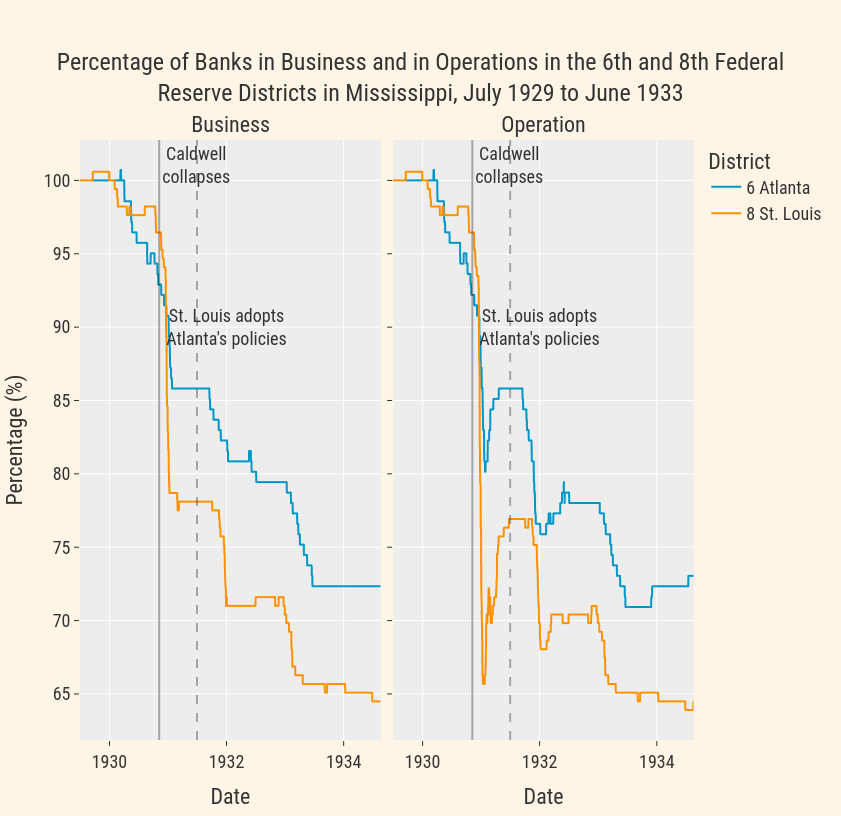

In [12]:
fig = px.line(df, x='date', y='percentage', color='district', facet_col="type", 
              color_discrete_map={ # replaces default color mapping by value
                "6 Atlanta": my_blue, "8 St. Louis": my_orange,
            },
            title = "Percentage of Banks in Business and in Operations in the 6th and 8th Federal<br>Reserve Districts in Mississippi, July 1929 to June 1933",
            labels={ # replaces default labels by column name
                "percentage": "Percentage (%)",  "date": "Date", "district":"District"
            },)

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].capitalize()))
fig.for_each_annotation(lambda a: a.update(font=dict(
            family="Roboto Condensed, bold",
            size=22,
            )))
fig.add_vline(x=datetime.datetime.strptime("1930-11-07", "%Y-%m-%d").timestamp() * 1000, line_width=2, 
              annotation_text="Caldwell<br>collapses")
              #annotation_position="left")
fig.add_vline(x=datetime.datetime.strptime("1931-07-01", "%Y-%m-%d").timestamp() * 1000, line_width=2, line_dash="dash")

fig.add_annotation(
    x=datetime.datetime.strptime("1932-01-01", "%Y-%m-%d").timestamp() * 1000,
    xref="x1",
    y=90,
    ax=70,
    showarrow=False,
        text="St. Louis adopts<br>Atlanta's policies"
)
fig.add_annotation(
    x=datetime.datetime.strptime("1932-01-01", "%Y-%m-%d").timestamp() * 1000,
    xref="x2",
    y=90,
    ax=70,
    showarrow=False,
    text="St. Louis adopts<br>Atlanta's policies"
)

fig.show()

In [13]:
display(df.query("date=='1931-07-01' & type == 'business'")[['n_banks']].diff())
ddf = df.loc[(df.date.dt.month==7) & (df.date.dt.day==1) & (df.type=="business")]

# Get rid of false positive SettingWithCopyWarning
ddf.is_copy = False
ddf.loc[:,'year'] = ddf.date.dt.year
#ddf

,n_banks
730,NaN
4486,11.0


/home/sjuhel/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/sjuhel/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



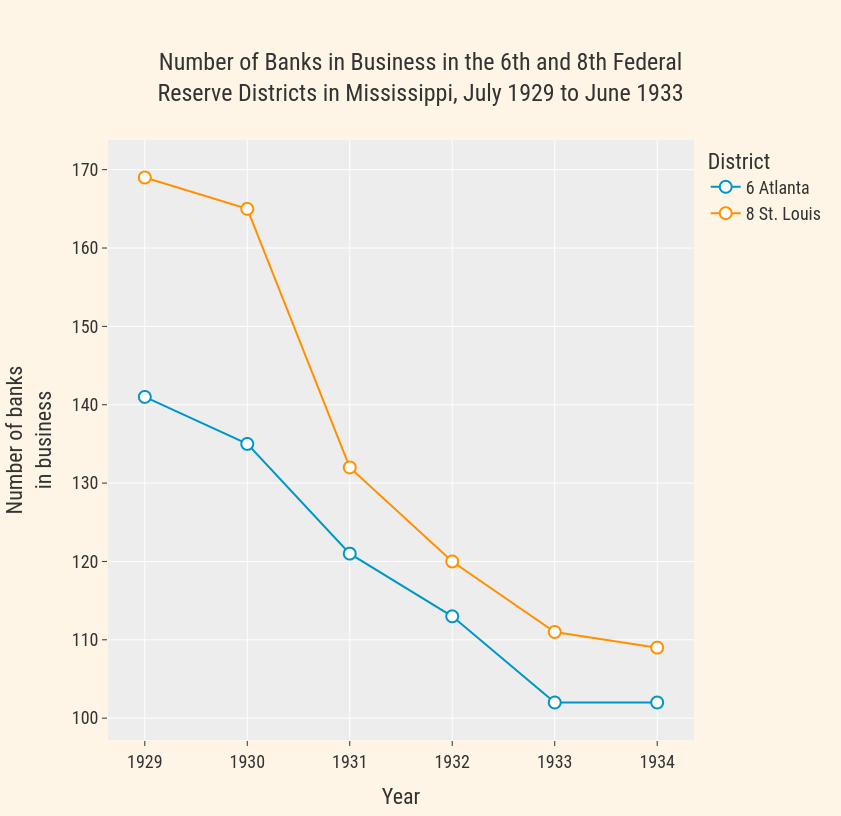

,date,type,district,n_banks,percentage,year
0,1929-07-01,business,6 Atlanta,141,100.000000,1929
365,1930-07-01,business,6 Atlanta,135,95.744681,1930
730,1931-07-01,business,6 Atlanta,121,85.815603,1931
1096,1932-07-01,business,6 Atlanta,113,80.141844,1932
1461,1933-07-01,business,6 Atlanta,102,72.340426,1933
1826,1934-07-01,business,6 Atlanta,102,72.340426,1934
3756,1929-07-01,business,8 St. Louis,169,100.000000,1929
4121,1930-07-01,business,8 St. Louis,165,97.633136,1930
4486,1931-07-01,business,8 St. Louis,132,78.106509,1931
4852,1932-07-01,business,8 St. Louis,120,71.005917,1932


In [35]:
import plotly.graph_objects as go

pio.templates["econ"].data.scatter = [go.Scatter(marker=dict(symbol="circle", size=12, color="white", line=dict(width=2)))]
fig = px.line(ddf, x='year', y='n_banks', color='district', markers=True,
              color_discrete_map={ # replaces default color mapping by value
                "6 Atlanta": my_blue, "8 St. Louis": my_orange,
            },
            title = "Number of Banks in Business in the 6th and 8th Federal<br>Reserve Districts in Mississippi, July 1929 to June 1933",
            labels={ # replaces default labels by column name
                "n_banks": "Number of banks<br>in business",  "year": "Year", "district":"District"
            },)

fig.show()
ddf

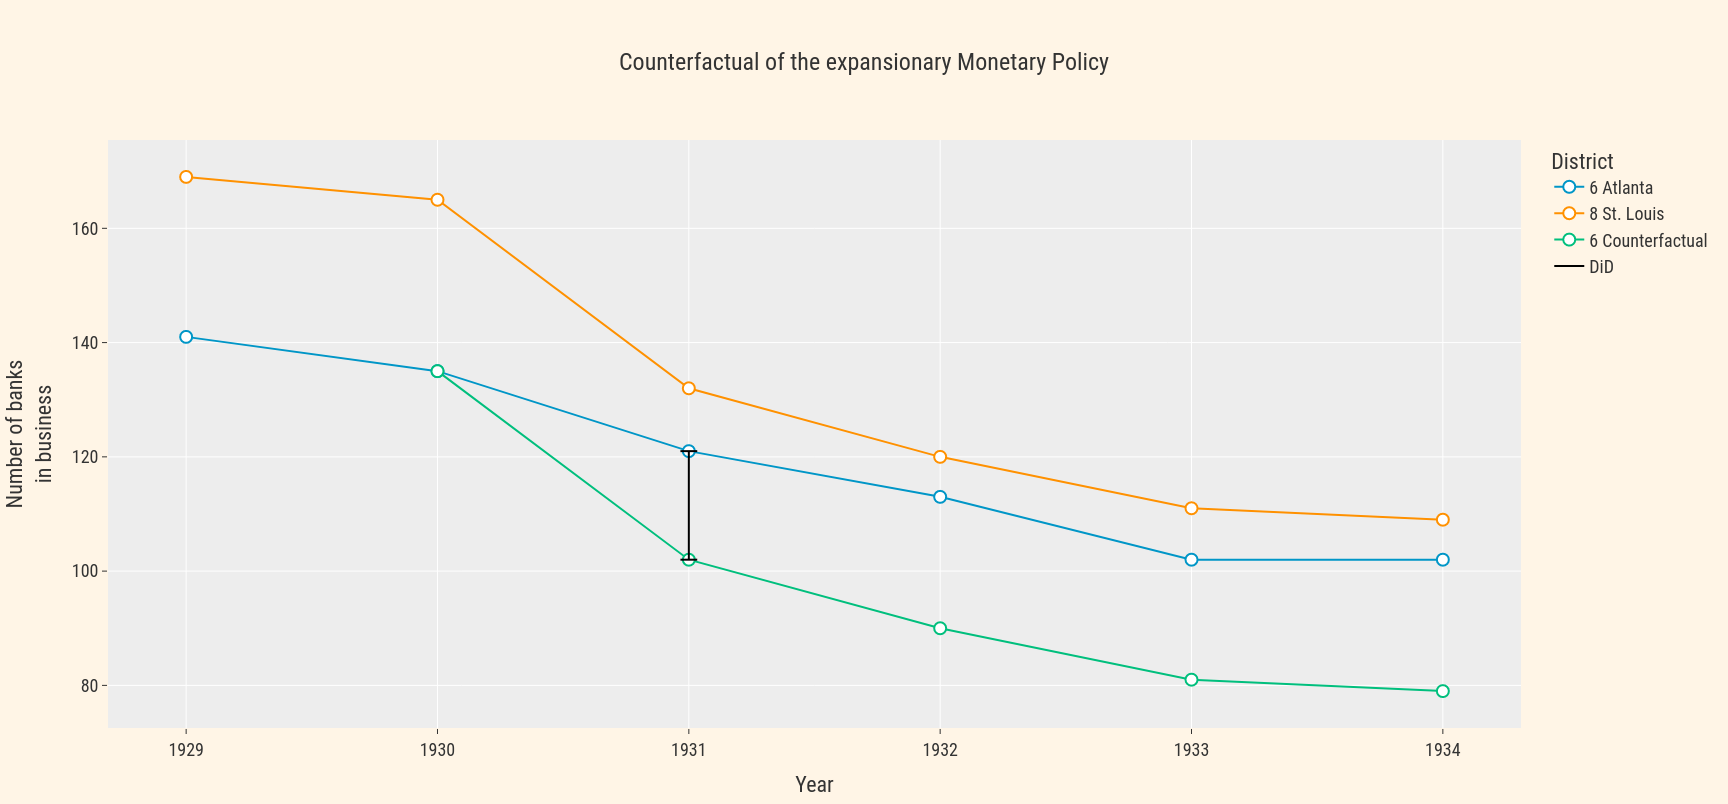

In [19]:
import numpy as np
dddf = ddf.pivot(index='date', columns='district')['n_banks']
a = dddf.loc[dddf.index.year==1930,'8 St. Louis'] - dddf.loc[(dddf.index.year==1930),'6 Atlanta']
dddf['diff86'] = a.values[0]
dddf['6 Counterfactual'] = np.where(dddf.index.year >= 1930, dddf['8 St. Louis'] - dddf['diff86'], np.NaN)
dddf = dddf.drop('diff86', axis=1).reset_index().melt('date', value_name='n_banks')
dddf['year'] = dddf.date.dt.year

fig = px.line(dddf, x='year', y='n_banks', color='district', markers=True,
              color_discrete_map={ # replaces default color mapping by value
                "6 Atlanta": my_blue, "8 St. Louis": my_orange,
            },
            title = "Counterfactual of the expansionary Monetary Policy",
            labels={ # replaces default labels by column name
                "n_banks": "Number of banks<br>in business",  "year": "Year", "district":"District"
            },)
fig.add_trace(go.Scatter(name = "DiD",
                         x=[1931,1931], 
                         y =[102,121],
                         line={"color":"black"},
                         marker=dict(symbol='line-ew'),
                        ))

fig.show()